In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1> Exploration of GCP database</h1>

In [2]:
# Import the excel project
xls = pd.ExcelFile("../../../data/ghg-emissions/gcp/Global_Carbon_Budget_2020v1.0.xlsx")

print("List of excel sheets in the database: ")
print(xls.sheet_names)

List of excel sheets in the database: 
['Summary', 'Global Carbon Budget', 'Fossil Emissions by Category', 'Land-Use Change Emissions', 'Ocean Sink', 'Terrestrial Sink', 'Cement Carbonation Sink', 'Historical Budget']


<h2>Global Carbon Budget Sheet</h2>

All values in billion tonnes of carbon per year (GtC/yr), for the globe. For values in billion tonnes of carbon dioxide per year (GtCO2/yr) , multiply the numbers below by 3.664. Note: 1 billion tonnes C = 1 petagram of carbon (10^15 gC) = 1 gigatonne C = 3.664 billion tonnes of CO2

All uncertainties represent ± 1 sigma error (68 % chance of being in the range provided). Here are the uncertainties

<ul>
    <li> Emissions from fossil fuel combustion and industrial processes (uncertainty of ±5% for a ± 1 sigma confidence level) </li>
    <li>Emissions from land-use change (uncertainty of ±0.7 GtC/yr)</li>
    <li>The atmospheric CO2 growth rate (variable uncertainty around 0.2 GtC/yr from 1980) is estimated directly from atmospheric CO2 concentration measurements, and provided by the US National Oceanic and Atmospheric Administration Earth System Research Laboratory (NOAA/ESRL).  http://www.esrl.noaa.gov/gmd/ccgg/trends/global.html</li>
    <li>The ocean sink (uncertainty of ±0.4 GtC/yr on average) is estimated from the average of several global ocean biogeochemistry models that reproduce the observed mean ocean sink of the 1990s. </li>
    <li>The land sink (uncertainty of ±0.9 GtC/yr on average) was estimated from the average of several dynamic global vegetation models that reproduce the observed mean total land sink of the 1990s.</li>
    <li>The cement carbonation sink: no uncertainty given in database</li>
    
</ul>

This database estimates the various terms that play a role in the carbon cycle:<br/>
<center>
$E_{fos} + E_{luc} = G_{ATM} + S_{OCEAN} + S_{LAND} + B_{IM}$ 
</center>

where,
<ul>
    <li>$E_{fos}$ is the emission of $CO_{2}$ due to fossil fuel combustion and oxidation from all energy and industrial processes, also including cement production and carbonation.</li>
    <li>$E_{luc}$ is the emission of $CO_{2}$ resulting from deliberate human activities on land, including those leading to land-use change</li>
    <li>$G_{atm}$ is the increase of $CO_{2}$ in atmosphere resulting from the two previous sources</li>
    <li>$S_{OCEAN}$ is the increase of $CO_{2}$ in ocean resulting from the two previous sources </li>
    <li>$S_{LAND}$ is the increase of $CO_{2}$ in the land resulting from the two previous sources </li>
</ul>


The budget imbalance is the sum of emissions (fossil fuel and industry + land-use change) minus (atmospheric growth + ocean sink + land sink + cement carbonation sink); it is a measure of our imperfect data and understanding of the contemporary carbon cycle. 

In [3]:
# Read dataframe
df_gcb = pd.read_excel(xls, 'Global Carbon Budget',header=20)

# Drop the unwanted columns that do not hold any data
df_gcb=df_gcb.iloc[:,:8]

# Drop the last lines corresponding to 2020 (only model) and commentary associated
df_gcb.drop(df_gcb.tail(4).index,inplace=True)

df_gcb.rename(columns={"fossil emissions excluding carbonation":"Fossil emissions excluding carbonation (GtC/yr)",
                   "land-use change emissions":"Land-use change emissions (GtC/yr)",
                   "atmospheric growth":"Atmospheric growth (GtC/yr)",
                   "ocean sink":"Ocean sink (GtC/yr)","land sink":"Land sink (GtC/yr)",
                   "cement carbonation sink":"Cement carbonation sink (GtC/yr)",
                   "budget imbalance":"Budget imbalance (GtC/yr)"},inplace=True)

# Change column Year to index
df_gcb.set_index("Year",inplace=True)

# Visual inspection
df_gcb.head(3)

,Fossil emissions excluding carbonation (GtC/yr),Land-use change emissions (GtC/yr),Atmospheric growth (GtC/yr),Ocean sink (GtC/yr),Land sink (GtC/yr),Cement carbonation sink (GtC/yr),Budget imbalance (GtC/yr)
Year,,,,,,,
1959,2.415,1.8042,2.0448,0.861368,0.677445,0.012684,0.622904
1960,2.548,1.659441,1.5123,0.839096,1.258399,0.013839,0.583806
1961,2.553,1.593636,1.6614,0.716516,0.660306,0.014726,1.093688


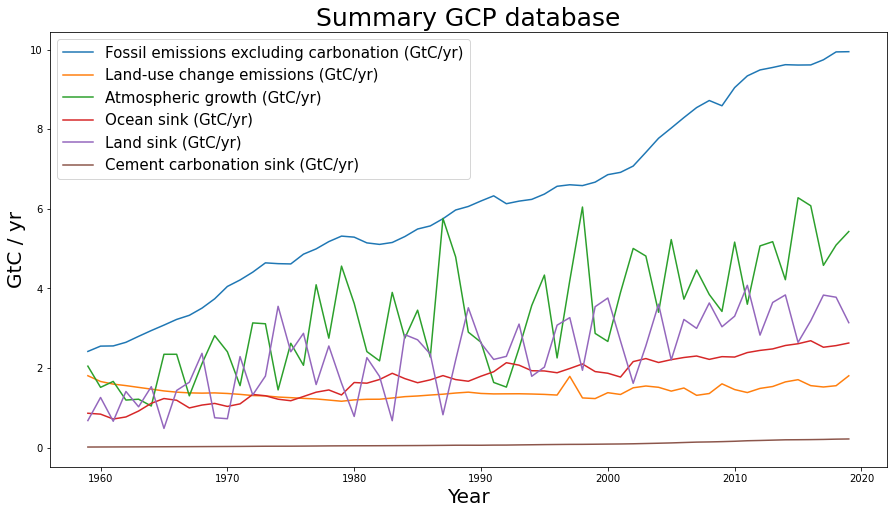

In [4]:
# Plotting

plt.figure(figsize=(15,8))
for name in df_gcb.columns:
    if name not in ["Budget imbalance (GtC/yr)"]:
        plt.plot(df_gcb.index,df_gcb[name],label=name)
plt.title("Summary GCP database",size=25)
plt.legend(prop={'size': 15})
plt.xlabel("Year",size=20)
plt.ylabel("GtC / yr",size=20)
ax=plt.gca()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

Text(0, 0.5, 'GtC / yr')

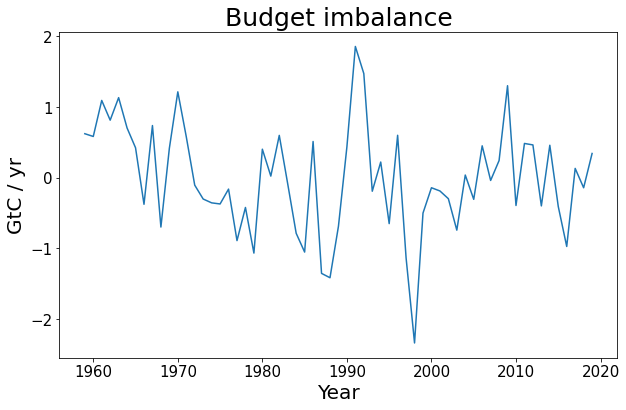

In [5]:
plt.figure(figsize=(10,6))

name="Budget imbalance (GtC/yr)"
plt.plot(df_gcb.index,df_gcb[name],label=name)
plt.title("Budget imbalance",size=25)
plt.xlabel("Year",size=20)
plt.ylabel("GtC / yr",size=20)

<h2>Fossil Emissions by Category : $E_{FOS}$</h2>

Fossil fuel and cement production emissions by fuel type. All values in million tonnes of carbon per year (MtC/yr), except the per capita emissions which are in tonnes of carbon per person per year (tC/person/yr).

The uncertainty for the global estimates is about ±5 % for a ± 1 sigma confidence level. <br/>

The Fossil emissions excluding carbonation is the value of the fossil emition where the sink of carbonation is also taken into account. 

In [6]:
# Read file
df_fe = pd.read_excel(xls, 'Fossil Emissions by Category',header=8)

# Drop blank columns
df_fe = df_fe.iloc[:,:9]

# Rename columns
df_fe.rename(columns={"fossil emissions excluding carbonation":"Fossil emissions excluding carbonation (MtC/yr)",
                     "Coal":"Coal (MtC/yr)","Oil":"Oil (MtC/yr)","Gas":"Gas (MtC/yr)",
                     "Cement emission":"Cement emission (MtC/yr)","Flaring":"Flaring (MtC/yr)",
                     "Other":"Other (MtC/yr)","Per Capita":"Per Capita (tC/person/yr)"},inplace=True)

# Change column Year to index
df_fe.set_index("Year",inplace=True)

# Visual inspection
df_fe.head(3)

,Fossil emissions excluding carbonation (MtC/yr),Coal (MtC/yr),Oil (MtC/yr),Gas (MtC/yr),Cement emission (MtC/yr),Flaring (MtC/yr),Other (MtC/yr),Per Capita (tC/person/yr)
Year,,,,,,,,
1959,2415.0,1349.0,794.0,207.0,40.0,25.0,0.0,0.81
1960,2548.0,1400.0,852.0,228.0,43.0,24.0,0.0,0.84
1961,2553.0,1342.0,902.0,241.0,45.0,24.0,0.0,0.83


<h2>Land-Use Change Emissions: $E_{LUC}$</h2>

The GCB estimate is the average of three bookkeeping models (uncertainty of ±0.7 GtC/yr). Individual results from dynamic global vegetation models are also provided.

In [7]:
# Read file
df_lu = pd.read_excel(xls, 'Land-Use Change Emissions',header=28)

# Drop blank columns
df_lu.drop([df_lu.columns[i] for i in [2,6,20,24]],axis=1,inplace=True)
df_lu = df_lu.iloc[:,:23]

# Change column Year to index
df_lu.set_index("Year",inplace=True)

# Create multi-level indexing on columns to reflect the differences of the models.
columns_try=[]
for c in df_lu.columns:
    if c in ['H&N', 'BLUE', 'OSCAR']:
        columns_try.append(("Bookkeeping Models",c))
    elif c in ['CABLE-POP', 'CLASSIC', 'CLM5.0', 'DLEM','IBIS', 'ISAM', 'ISBA-CTRIP', 'JSBACH', 'JULES-ES', 
               'LPJ-GUESS ','LPJ ', 'LPX-Bern', 'OCNv2', 'SDGVM', 'VISIT', 'YIBs']:
        columns_try.append(("Individual DGVM Models",c))
    elif c in ['MMM (multi-model mean)', 'Model Spread (sd)']:
        columns_try.append(('Statistics',c))
    else:
        columns_try.append(('GCP',c))
df_lu.columns = pd.MultiIndex.from_tuples(columns_try)

# Visual inspection
df_lu.head(3)

GCP Bookkeeping Models                     Individual DGVM Models  \
           GCB                H&N      BLUE     OSCAR              CABLE-POP   
Year                                                                           
1959  1.804200           0.997975  2.713034  1.701591                   1.88   
1960  1.659441           1.023785  2.370734  1.583803                   1.64   
1961  1.593636           1.054558  2.184734  1.541616                   1.61   

                                           ...                            \
     CLASSIC CLM5.0      DLEM  IBIS  ISAM  ... JULES-ES LPJ-GUESS   LPJ    
Year                                       ...                             
1959    1.58   2.32  2.603857  1.85  1.60  ...     1.66       1.83  1.50   
1960    0.35   2.14  2.734774  1.38  1.66  ...     1.63       2.08  1.11   
1961    1.23   1.96  2.191460  1.29  1.01  ...     1.80       1.64  1.09   

                                                  Statistics                    
     LPX-Bern OCNv2 SDGVM VISIT  YIBs MMM (multi-model mean) Model Spread (sd)  
Year                                                                            
1959     1.22  2.28  2.38  1.89  2.26               1.813109          0.420901  
1960     1.23  2.39  2.81  1.66  2.13               1.691575          0.613898  
1961     0.82  1.81  2.32  1.61  2.06               1.525204          0.437321  

[3 rows x 22 columns]

<h2>Ocean Sink</h2>

Ocean CO2 sink (positive values represent a flux from the atmosphere to the ocean). All values in billion tonnes of carbon per year (GtC/yr), for the globe.

The ocean sink (uncertainty of ±0.4 GtC/yr on average) is estimated from the average of several global ocean biogeochemistry models that reproduce the observed mean ocean sink of the 1990s.  Cite as: Friedlingstein et al (2020; see summary tab)

Note: the data products include a pre-industrial steady state source of CO2 from rivers (of about 0.61 GtC/yr) and therefore are not directly comparable with the ocean model results

In [8]:
# Read data
df_os = pd.read_excel(xls, 'Ocean Sink',header=24)

# Drop blank columns
df_os.drop([df_os.columns[i] for i in [3,13,16,24]],axis=1,inplace=True)
df_os=df_os.iloc[:,:21]

df_os.rename(columns={"year":"Year"},inplace=True)

# Change column Year to index
df_os.set_index("Year",inplace=True)

# Create multi-level indexing on columns to reflect the differences of the models.
columns_try=[]
for c in df_os.columns:
    if c in ['CESM-ETH', 'CSIRO', 'FESOM', 'MPI','CNRM', 'PlankTOM', 'NorESM', 'Princeton', 
             'IPSL','MMM (multi-model mean)', 'Model Spread (sd)']:
        columns_try.append(("GOBM",c))
    elif c in ['MPI-SOMFFN', 'Jena-MLS','CMEMS', 'CSIR', 'Watson','mean data-products (excl. Watson.)',
               'sd data-products (excl. Watson.)']:
        columns_try.append(("Data-based products",c))
    else:
        columns_try.append(('GCP',c))
df_os.columns = pd.MultiIndex.from_tuples(columns_try)


# Visual inspection
df_os.head(3)

GCP                          GOBM                                \
           GCB 1 sigma uncertainty  CESM-ETH     CSIRO     FESOM       MPI   
Year                                                                         
1959  0.861368                0.27  0.945789  1.031596  1.013141  0.800970   
1960  0.839096                0.24  0.886618  1.031596  1.033007  0.731750   
1961  0.716516                0.24  0.620557  0.891379  0.903881  0.721862   

                                                                               \
          CNRM  PlankTOM    NorESM Princeton      IPSL MMM (multi-model mean)   
Year                                                                            
1959  0.788258  0.890707  1.103008  0.347769  0.831071               0.861368   
1960  0.768302  0.836543  1.074161  0.482066  0.707826               0.839096   
1961  0.498897  0.799430  1.010136  0.416922  0.585579               0.716516   

                       Data-based products                             \
     Model Spread (sd)          MPI-SOMFFN Jena-MLS CMEMS CSIR Watson   
Year                                                                    
1959          0.208722                 NaN      NaN   NaN  NaN    NaN   
1960          0.180560                 NaN      NaN   NaN  NaN    NaN   
1961          0.189228                 NaN      NaN   NaN  NaN    NaN   

                                                                          
     mean data-products (excl. Watson.) sd data-products (excl. Watson.)  
Year                                                                      
1959                                NaN                              NaN  
1960                                NaN                              NaN  
1961                                NaN                              NaN

<h2>Terrestrial Sink</h2>

Terrestrial CO2 sink (positive values represent a flux from the atmosphere to the land). All values in billion tonnes of carbon per year (GtC/yr), for the globe. 

Methods: The terrestrial sink (uncertainty of ±0.9 GtC/yr on average) is estimated from the average of several Dynamic Global Vegetation Models (DGVMs) that reproduce the observed mean total land uptake of the 1990s.  Cite as: Friedlingstein et al (2020; see summary tab)

In [9]:
# Read data
df_ts = pd.read_excel(xls, 'Terrestrial Sink',header=24)

# Drop blank columns
df_ts.drop([df_ts.columns[i] for i in [2,20]],axis=1,inplace=True)
df_ts=df_ts.iloc[:,:21]

# Change column Year to index
df_ts.set_index("Year",inplace=True)

# Create multi-level indexing on columns to reflect the differences of the models.
columns_try=[]
for c in df_ts.columns:
    if c in ['CABLE-POP', 'CLASSIC', 'CLM5.0', 'DLEM', 'IBIS', 'ISAM','ISBA-CTRIP', 'JSBACH', 'JULES-ES', 
             'LPJ-GUESS ', 'LPJ ', 'LPX-Bern','OCNv2', 'ORCHIDEE-v3', 'SDGVM', 'VISIT', 'YIBs',
             'MMM (multi-model mean)', 'Model Spread (sd)']:
        columns_try.append(("DGVM models",c))
    else:
        columns_try.append(('GCP',c))
df_ts.columns = pd.MultiIndex.from_tuples(columns_try)

# Visual inspection
df_ts.head(3)

GCP DGVM models                                                  \
           GCB   CABLE-POP CLASSIC CLM5.0      DLEM  IBIS  ISAM ISBA-CTRIP   
Year                                                                         
1959  0.677445        0.70    0.29   1.23  0.942562  0.98  1.24       0.90   
1960  1.258399        1.77    0.90   1.42  1.712783  1.05  1.41       1.63   
1961  0.660306        0.35    0.80   0.56  0.695206  0.43  1.00       0.53   

                                                                              \
     JSBACH JULES-ES LPJ-GUESS   LPJ  LPX-Bern OCNv2 ORCHIDEE-v3 SDGVM VISIT   
Year                                                                           
1959   0.55     1.15      -0.94 -0.43     0.26  1.15       0.634  0.20  1.33   
1960   1.83     1.48       0.86  0.41     0.86  1.08       0.990  0.55  1.78   
1961   1.66     0.69       0.72 -0.46    -0.02  1.34       0.930 -0.85  1.48   

                                                     
      YIBs MMM (multi-model mean) Model Spread (sd)  
Year                                                 
1959  1.33               0.677445          0.620481  
1960  1.66               1.258399          0.439208  
1961  1.37               0.660306          0.642858

<h2>Cement Carbonation Sink</h2>

Cement Carbonation sink (positive values represent a flux from the atmosphere to the land). All values in million tonnes of carbon per year (MtC/yr).

Methods: Full details of the method are described in Friedlingstein et al (2020).

In [10]:
# Read data
df_ccs = pd.read_excel(xls, 'Cement Carbonation Sink',header=9)

# Drop blank columns
df_ccs.drop([df_ccs.columns[i] for i in [2]],axis=1,inplace=True)
df_ccs=df_ccs.iloc[:,:4]

# Change column Year to index
df_ccs.set_index("Year",inplace=True)

# Visual inspection
df_ccs.head(3)

,GCB,Cao,Guo
Year,,,
1959,12.683730,10.207389,15.160072
1960,13.838800,11.140840,16.536759
1961,14.726464,11.837368,17.615559


<h2>Historical Budget</h2>

There is also a historical budget, where more past years are available. But this is not very interesting for us, as all the information for recent years are common with the ones in the global carbon budget sheet.

In [11]:
df_his = pd.read_excel(xls, 'Historical Budget',header=9)
